## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9615674	total: 58.7ms	remaining: 58.7s
1:	learn: 0.9434813	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9234733	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9068261	total: 61.9ms	remaining: 15.4s
4:	learn: 0.8898605	total: 62.7ms	remaining: 12.5s
5:	learn: 0.8740355	total: 63.7ms	remaining: 10.5s
6:	learn: 0.8585225	total: 64.5ms	remaining: 9.16s
7:	learn: 0.8415611	total: 65.4ms	remaining: 8.11s
8:	learn: 0.8267005	total: 66.2ms	remaining: 7.29s
9:	learn: 0.8097148	total: 67.1ms	remaining: 6.64s
10:	learn: 0.7945485	total: 67.8ms	remaining: 6.1s
11:	learn: 0.7814034	total: 68.7ms	remaining: 5.66s
12:	learn: 0.7682700	total: 69.5ms	remaining: 5.27s
13:	learn: 0.7542067	total: 70.2ms	remaining: 4.94s
14:	learn: 0.7417712	total: 71.1ms	remaining: 4.67s
15:	learn: 0.7292636	total: 72ms	remaining: 4.43s
16:	learn: 0.7163160	total: 72.7ms	remaining: 4.2s
17:	learn: 0.7043515	total: 73.5ms	remaining: 4.01s
18:	learn: 0.6923847	total: 74.9ms	remaining: 3.

43:	learn: 0.4830846	total: 95.4ms	remaining: 2.07s
44:	learn: 0.4776482	total: 96.3ms	remaining: 2.04s
45:	learn: 0.4724148	total: 97.2ms	remaining: 2.02s
46:	learn: 0.4675906	total: 98ms	remaining: 1.99s
47:	learn: 0.4617305	total: 98.9ms	remaining: 1.96s
48:	learn: 0.4558994	total: 99.9ms	remaining: 1.94s
49:	learn: 0.4512155	total: 101ms	remaining: 1.91s
50:	learn: 0.4455435	total: 102ms	remaining: 1.89s
51:	learn: 0.4407237	total: 102ms	remaining: 1.87s
52:	learn: 0.4362603	total: 103ms	remaining: 1.84s
53:	learn: 0.4329454	total: 104ms	remaining: 1.82s
54:	learn: 0.4286271	total: 105ms	remaining: 1.8s
55:	learn: 0.4248833	total: 106ms	remaining: 1.78s
56:	learn: 0.4213614	total: 106ms	remaining: 1.76s
57:	learn: 0.4168409	total: 107ms	remaining: 1.74s
58:	learn: 0.4134600	total: 108ms	remaining: 1.72s
59:	learn: 0.4095700	total: 109ms	remaining: 1.71s
60:	learn: 0.4044461	total: 110ms	remaining: 1.69s
61:	learn: 0.4004480	total: 110ms	remaining: 1.67s
62:	learn: 0.3975372	total: 

160:	learn: 0.2396736	total: 192ms	remaining: 1s
161:	learn: 0.2392618	total: 193ms	remaining: 1000ms
162:	learn: 0.2388640	total: 194ms	remaining: 997ms
163:	learn: 0.2385099	total: 195ms	remaining: 994ms
164:	learn: 0.2373494	total: 196ms	remaining: 991ms
165:	learn: 0.2365865	total: 197ms	remaining: 988ms
166:	learn: 0.2359361	total: 197ms	remaining: 985ms
167:	learn: 0.2352121	total: 198ms	remaining: 982ms
168:	learn: 0.2342193	total: 199ms	remaining: 979ms
169:	learn: 0.2335865	total: 200ms	remaining: 976ms
170:	learn: 0.2326678	total: 201ms	remaining: 973ms
171:	learn: 0.2319404	total: 202ms	remaining: 970ms
172:	learn: 0.2314190	total: 202ms	remaining: 967ms
173:	learn: 0.2309866	total: 203ms	remaining: 964ms
174:	learn: 0.2306209	total: 204ms	remaining: 962ms
175:	learn: 0.2305141	total: 205ms	remaining: 958ms
176:	learn: 0.2296746	total: 205ms	remaining: 955ms
177:	learn: 0.2289186	total: 206ms	remaining: 953ms
178:	learn: 0.2284014	total: 207ms	remaining: 950ms
179:	learn: 0.

275:	learn: 0.1852544	total: 285ms	remaining: 749ms
276:	learn: 0.1847626	total: 286ms	remaining: 748ms
277:	learn: 0.1842367	total: 287ms	remaining: 746ms
278:	learn: 0.1836567	total: 288ms	remaining: 744ms
279:	learn: 0.1828847	total: 289ms	remaining: 743ms
280:	learn: 0.1824185	total: 290ms	remaining: 742ms
281:	learn: 0.1820416	total: 291ms	remaining: 740ms
282:	learn: 0.1818295	total: 291ms	remaining: 739ms
283:	learn: 0.1816537	total: 292ms	remaining: 737ms
284:	learn: 0.1813585	total: 293ms	remaining: 735ms
285:	learn: 0.1807606	total: 294ms	remaining: 735ms
286:	learn: 0.1804341	total: 295ms	remaining: 733ms
287:	learn: 0.1798694	total: 296ms	remaining: 732ms
288:	learn: 0.1794999	total: 297ms	remaining: 730ms
289:	learn: 0.1791824	total: 298ms	remaining: 729ms
290:	learn: 0.1789165	total: 298ms	remaining: 727ms
291:	learn: 0.1786828	total: 299ms	remaining: 725ms
292:	learn: 0.1780652	total: 300ms	remaining: 725ms
293:	learn: 0.1775757	total: 301ms	remaining: 724ms
294:	learn: 

390:	learn: 0.1458988	total: 383ms	remaining: 596ms
391:	learn: 0.1457013	total: 384ms	remaining: 595ms
392:	learn: 0.1454220	total: 384ms	remaining: 594ms
393:	learn: 0.1450537	total: 385ms	remaining: 593ms
394:	learn: 0.1448140	total: 386ms	remaining: 591ms
395:	learn: 0.1445704	total: 387ms	remaining: 590ms
396:	learn: 0.1441044	total: 388ms	remaining: 589ms
397:	learn: 0.1437743	total: 388ms	remaining: 588ms
398:	learn: 0.1433936	total: 389ms	remaining: 586ms
399:	learn: 0.1432013	total: 390ms	remaining: 585ms
400:	learn: 0.1429790	total: 391ms	remaining: 584ms
401:	learn: 0.1424766	total: 392ms	remaining: 583ms
402:	learn: 0.1421927	total: 393ms	remaining: 581ms
403:	learn: 0.1419213	total: 393ms	remaining: 580ms
404:	learn: 0.1415876	total: 394ms	remaining: 579ms
405:	learn: 0.1412841	total: 395ms	remaining: 578ms
406:	learn: 0.1409974	total: 396ms	remaining: 577ms
407:	learn: 0.1406010	total: 397ms	remaining: 576ms
408:	learn: 0.1404676	total: 398ms	remaining: 575ms
409:	learn: 

503:	learn: 0.1154556	total: 476ms	remaining: 468ms
504:	learn: 0.1150858	total: 477ms	remaining: 467ms
505:	learn: 0.1149724	total: 477ms	remaining: 466ms
506:	learn: 0.1147575	total: 478ms	remaining: 465ms
507:	learn: 0.1145676	total: 479ms	remaining: 464ms
508:	learn: 0.1142810	total: 480ms	remaining: 463ms
509:	learn: 0.1140921	total: 480ms	remaining: 462ms
510:	learn: 0.1139924	total: 481ms	remaining: 461ms
511:	learn: 0.1137459	total: 482ms	remaining: 460ms
512:	learn: 0.1135110	total: 483ms	remaining: 459ms
513:	learn: 0.1134256	total: 484ms	remaining: 458ms
514:	learn: 0.1130817	total: 485ms	remaining: 457ms
515:	learn: 0.1129983	total: 486ms	remaining: 456ms
516:	learn: 0.1126287	total: 487ms	remaining: 455ms
517:	learn: 0.1125790	total: 487ms	remaining: 454ms
518:	learn: 0.1123814	total: 488ms	remaining: 453ms
519:	learn: 0.1123113	total: 489ms	remaining: 451ms
520:	learn: 0.1120985	total: 490ms	remaining: 450ms
521:	learn: 0.1120216	total: 491ms	remaining: 449ms
522:	learn: 

621:	learn: 0.0955429	total: 573ms	remaining: 348ms
622:	learn: 0.0953598	total: 574ms	remaining: 347ms
623:	learn: 0.0952058	total: 575ms	remaining: 346ms
624:	learn: 0.0951820	total: 576ms	remaining: 346ms
625:	learn: 0.0951610	total: 577ms	remaining: 345ms
626:	learn: 0.0949402	total: 577ms	remaining: 344ms
627:	learn: 0.0947795	total: 578ms	remaining: 343ms
628:	learn: 0.0946255	total: 579ms	remaining: 342ms
629:	learn: 0.0943779	total: 580ms	remaining: 341ms
630:	learn: 0.0943565	total: 581ms	remaining: 340ms
631:	learn: 0.0941596	total: 582ms	remaining: 339ms
632:	learn: 0.0940425	total: 583ms	remaining: 338ms
633:	learn: 0.0938708	total: 584ms	remaining: 337ms
634:	learn: 0.0936529	total: 585ms	remaining: 336ms
635:	learn: 0.0934143	total: 586ms	remaining: 335ms
636:	learn: 0.0932095	total: 586ms	remaining: 334ms
637:	learn: 0.0930280	total: 587ms	remaining: 333ms
638:	learn: 0.0929220	total: 588ms	remaining: 332ms
639:	learn: 0.0928124	total: 589ms	remaining: 331ms
640:	learn: 

731:	learn: 0.0817939	total: 666ms	remaining: 244ms
732:	learn: 0.0817029	total: 667ms	remaining: 243ms
733:	learn: 0.0816031	total: 668ms	remaining: 242ms
734:	learn: 0.0814843	total: 669ms	remaining: 241ms
735:	learn: 0.0814257	total: 670ms	remaining: 240ms
736:	learn: 0.0813430	total: 671ms	remaining: 239ms
737:	learn: 0.0811792	total: 672ms	remaining: 238ms
738:	learn: 0.0811671	total: 672ms	remaining: 238ms
739:	learn: 0.0810737	total: 673ms	remaining: 237ms
740:	learn: 0.0808715	total: 674ms	remaining: 236ms
741:	learn: 0.0807596	total: 675ms	remaining: 235ms
742:	learn: 0.0805994	total: 676ms	remaining: 234ms
743:	learn: 0.0804161	total: 677ms	remaining: 233ms
744:	learn: 0.0803967	total: 677ms	remaining: 232ms
745:	learn: 0.0803896	total: 678ms	remaining: 231ms
746:	learn: 0.0802396	total: 679ms	remaining: 230ms
747:	learn: 0.0800738	total: 680ms	remaining: 229ms
748:	learn: 0.0799518	total: 681ms	remaining: 228ms
749:	learn: 0.0798838	total: 681ms	remaining: 227ms
750:	learn: 

848:	learn: 0.0688344	total: 764ms	remaining: 136ms
849:	learn: 0.0687540	total: 765ms	remaining: 135ms
850:	learn: 0.0686396	total: 766ms	remaining: 134ms
851:	learn: 0.0684835	total: 767ms	remaining: 133ms
852:	learn: 0.0683499	total: 768ms	remaining: 132ms
853:	learn: 0.0683427	total: 768ms	remaining: 131ms
854:	learn: 0.0681804	total: 769ms	remaining: 130ms
855:	learn: 0.0680578	total: 770ms	remaining: 130ms
856:	learn: 0.0679698	total: 771ms	remaining: 129ms
857:	learn: 0.0678913	total: 772ms	remaining: 128ms
858:	learn: 0.0678189	total: 772ms	remaining: 127ms
859:	learn: 0.0677111	total: 773ms	remaining: 126ms
860:	learn: 0.0675469	total: 774ms	remaining: 125ms
861:	learn: 0.0674392	total: 775ms	remaining: 124ms
862:	learn: 0.0673165	total: 776ms	remaining: 123ms
863:	learn: 0.0672079	total: 776ms	remaining: 122ms
864:	learn: 0.0671029	total: 777ms	remaining: 121ms
865:	learn: 0.0670311	total: 778ms	remaining: 120ms
866:	learn: 0.0669590	total: 779ms	remaining: 119ms
867:	learn: 

958:	learn: 0.0592853	total: 858ms	remaining: 36.7ms
959:	learn: 0.0592311	total: 858ms	remaining: 35.8ms
960:	learn: 0.0590740	total: 860ms	remaining: 34.9ms
961:	learn: 0.0589782	total: 861ms	remaining: 34ms
962:	learn: 0.0589737	total: 862ms	remaining: 33.1ms
963:	learn: 0.0589685	total: 862ms	remaining: 32.2ms
964:	learn: 0.0588807	total: 863ms	remaining: 31.3ms
965:	learn: 0.0588322	total: 864ms	remaining: 30.4ms
966:	learn: 0.0587138	total: 865ms	remaining: 29.5ms
967:	learn: 0.0585871	total: 866ms	remaining: 28.6ms
968:	learn: 0.0585367	total: 867ms	remaining: 27.7ms
969:	learn: 0.0584501	total: 867ms	remaining: 26.8ms
970:	learn: 0.0583441	total: 868ms	remaining: 25.9ms
971:	learn: 0.0583398	total: 869ms	remaining: 25ms
972:	learn: 0.0582487	total: 870ms	remaining: 24.1ms
973:	learn: 0.0581511	total: 870ms	remaining: 23.2ms
974:	learn: 0.0580894	total: 871ms	remaining: 22.3ms
975:	learn: 0.0580099	total: 872ms	remaining: 21.4ms
976:	learn: 0.0579632	total: 873ms	remaining: 20.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

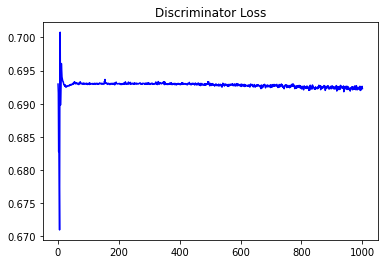

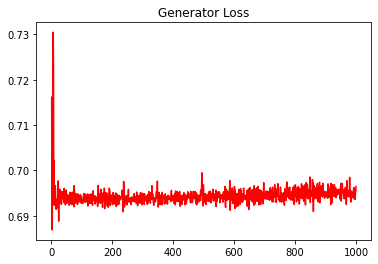

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15159009974528437


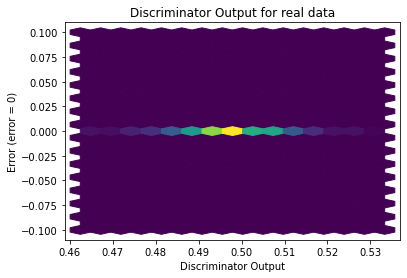

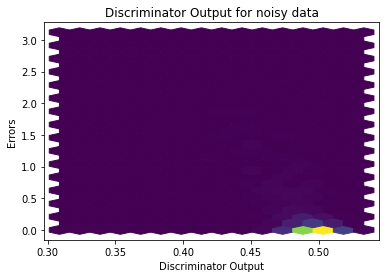

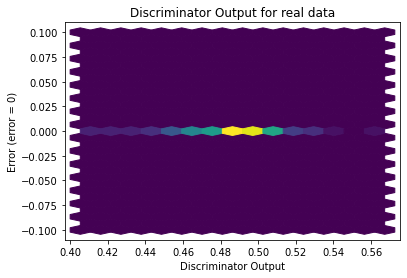

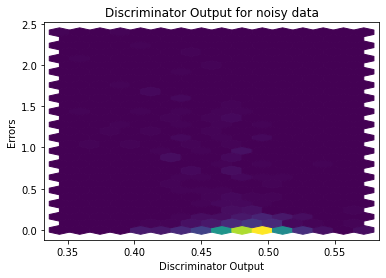

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


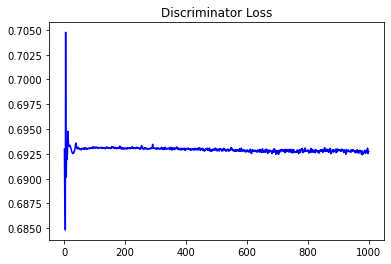

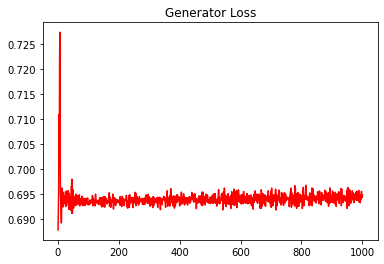

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11987851872189242


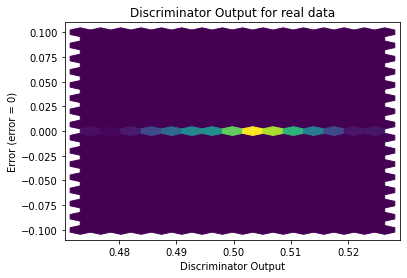

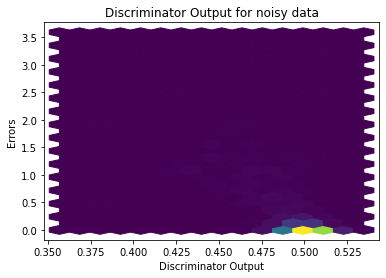

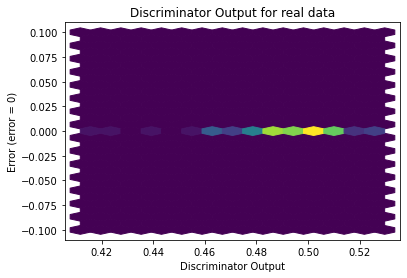

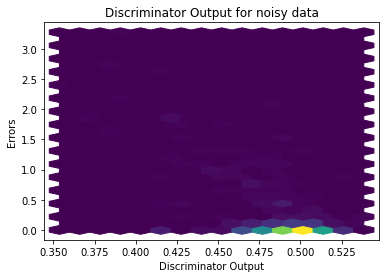

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6266]], requires_grad=True)
